In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import (r2_score, mean_absolute_error, mean_absolute_percentage_error)
from scipy.stats import probplot
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('AmesHousing.csv')

In [3]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,...,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,...,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,...,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,...,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,NaN,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,...,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,...,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [ ]:
df.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,2929.000000,2929.000000,2929.000000,2929.000000,2930.000000,2930.000000,2930.000000,2930.000000,2928.000000,2928.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2771.000000,2929.000000,2929.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,442.629566,49.722431,559.262547,1051.614544,1159.557679,335.455973,4.676792,1499.690444,0.431352,0.061134,1.566553,0.379522,2.854266,1.044369,6.443003,0.599317,1978.132443,1.766815,472.819734,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,455.590839,169.168476,439.494153,440.615067,391.890885,428.395715,46.310510,505.508887,0.524820,0.245254,0.552941,0.502629,0.827731,0.214076,1.572964,0.647921,25.528411,0.760566,215.046549,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,0.000000,219.000000,793.000000,876.250000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,370.000000,0.000000,466.000000,990.000000,1084.000000,0.000000,0.000000,1442.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,734.000000,0.000000,802.000000,1302.000000,1384.000000,703.750000,0.000000,1742.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [5]:
df.fillna(0, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2930 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            2930 non-null   object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [7]:
df.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,57.647782,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.096928,442.478498,49.705461,559.071672,1051.255631,1159.557679,335.455973,4.676792,1499.690444,0.431058,0.061092,1.566553,0.379522,2.854266,1.044369,6.443003,0.599317,1870.786689,1.766212,472.658362,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,33.499441,7880.017759,1.411026,1.111537,30.245361,20.860286,178.634545,455.586452,169.142089,439.540571,440.968018,391.890885,428.395715,46.310510,505.508887,0.524762,0.245175,0.552941,0.502629,0.827731,0.214076,1.572964,0.647921,448.894077,0.761137,215.187196,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,43.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,0.000000,219.000000,793.000000,876.250000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1957.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,63.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,370.000000,0.000000,465.500000,990.000000,1084.000000,0.000000,0.000000,1442.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1977.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,78.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,162.750000,734.000000,0.000000,801.750000,1301.500000,1384.000000,703.750000,0.000000,1742.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [8]:

# ---------------------
# Ordinal Feature Mappings
# ---------------------
ordinal_columns = {
    'Exter Qual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
    'Bsmt Qual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
    'Kitchen Qual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
    'Heating QC': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
    'Garage Finish': {'Fin': 3, 'RFn': 2, 'Unf': 1},
    'Functional': {'Typ': 7, 'Min1': 6, 'Min2': 5, 'Mod': 4, 'Maj1': 3, 'Maj2': 2, 'Sev': 1, 'Sal': 0},
    'Land Slope': {'Gtl': 3, 'Mod': 2, 'Sev': 1},
    'Paved Drive': {'Y': 2, 'P': 1, 'N': 0},
    'Pool QC': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2},
    'Fireplace Qu': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
    'Fence': {'GdPrv': 4, 'MnPrv': 3, 'GdWo': 2, 'MnWw': 1},
    'Exter Cond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
    'Bsmt Cond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
}

# Fill missing and apply ordinal mappings
for col, mapping in ordinal_columns.items():
    df[col] = df[col].map(mapping).fillna(0)

# ---------------------
# Nominal Feature One-Hot Encoding
# ---------------------
nominal_columns = [
    'MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
    'Lot Config', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
    'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd',
    'Mas Vnr Type', 'Foundation', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2',
    'Heating', 'Central Air', 'Electrical', 'Garage Type', 'Garage Qual', 'Garage Cond',
    'Misc Feature', 'Sale Type', 'Sale Condition'
]

# Fill missing nominal values with "Missing"
df[nominal_columns] = df[nominal_columns].fillna("Missing")

# One-hot encode and ensure all are 0/1
df_encoded = pd.get_dummies(df, columns=nominal_columns, drop_first=True)

# ---------------------
# Fill Any Remaining NaNs in Numeric Columns
# ---------------------
df_encoded = df_encoded.fillna(0)

# Convert boolean columns to integers (0/1)
df_encoded = df_encoded.apply(lambda col: col.astype(int) if col.dtype == 'bool' else col)

# ✅ Final encoded dataset: df_encoded is all-numeric and ML-ready


In [9]:
non_numeric_cols = df_encoded.select_dtypes(exclude=['number']).columns
print(non_numeric_cols)


Index([], dtype='object')


In [10]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Columns: 240 entries, Order to Sale Condition_Partial
dtypes: float64(17), int64(223)
memory usage: 5.4 MB


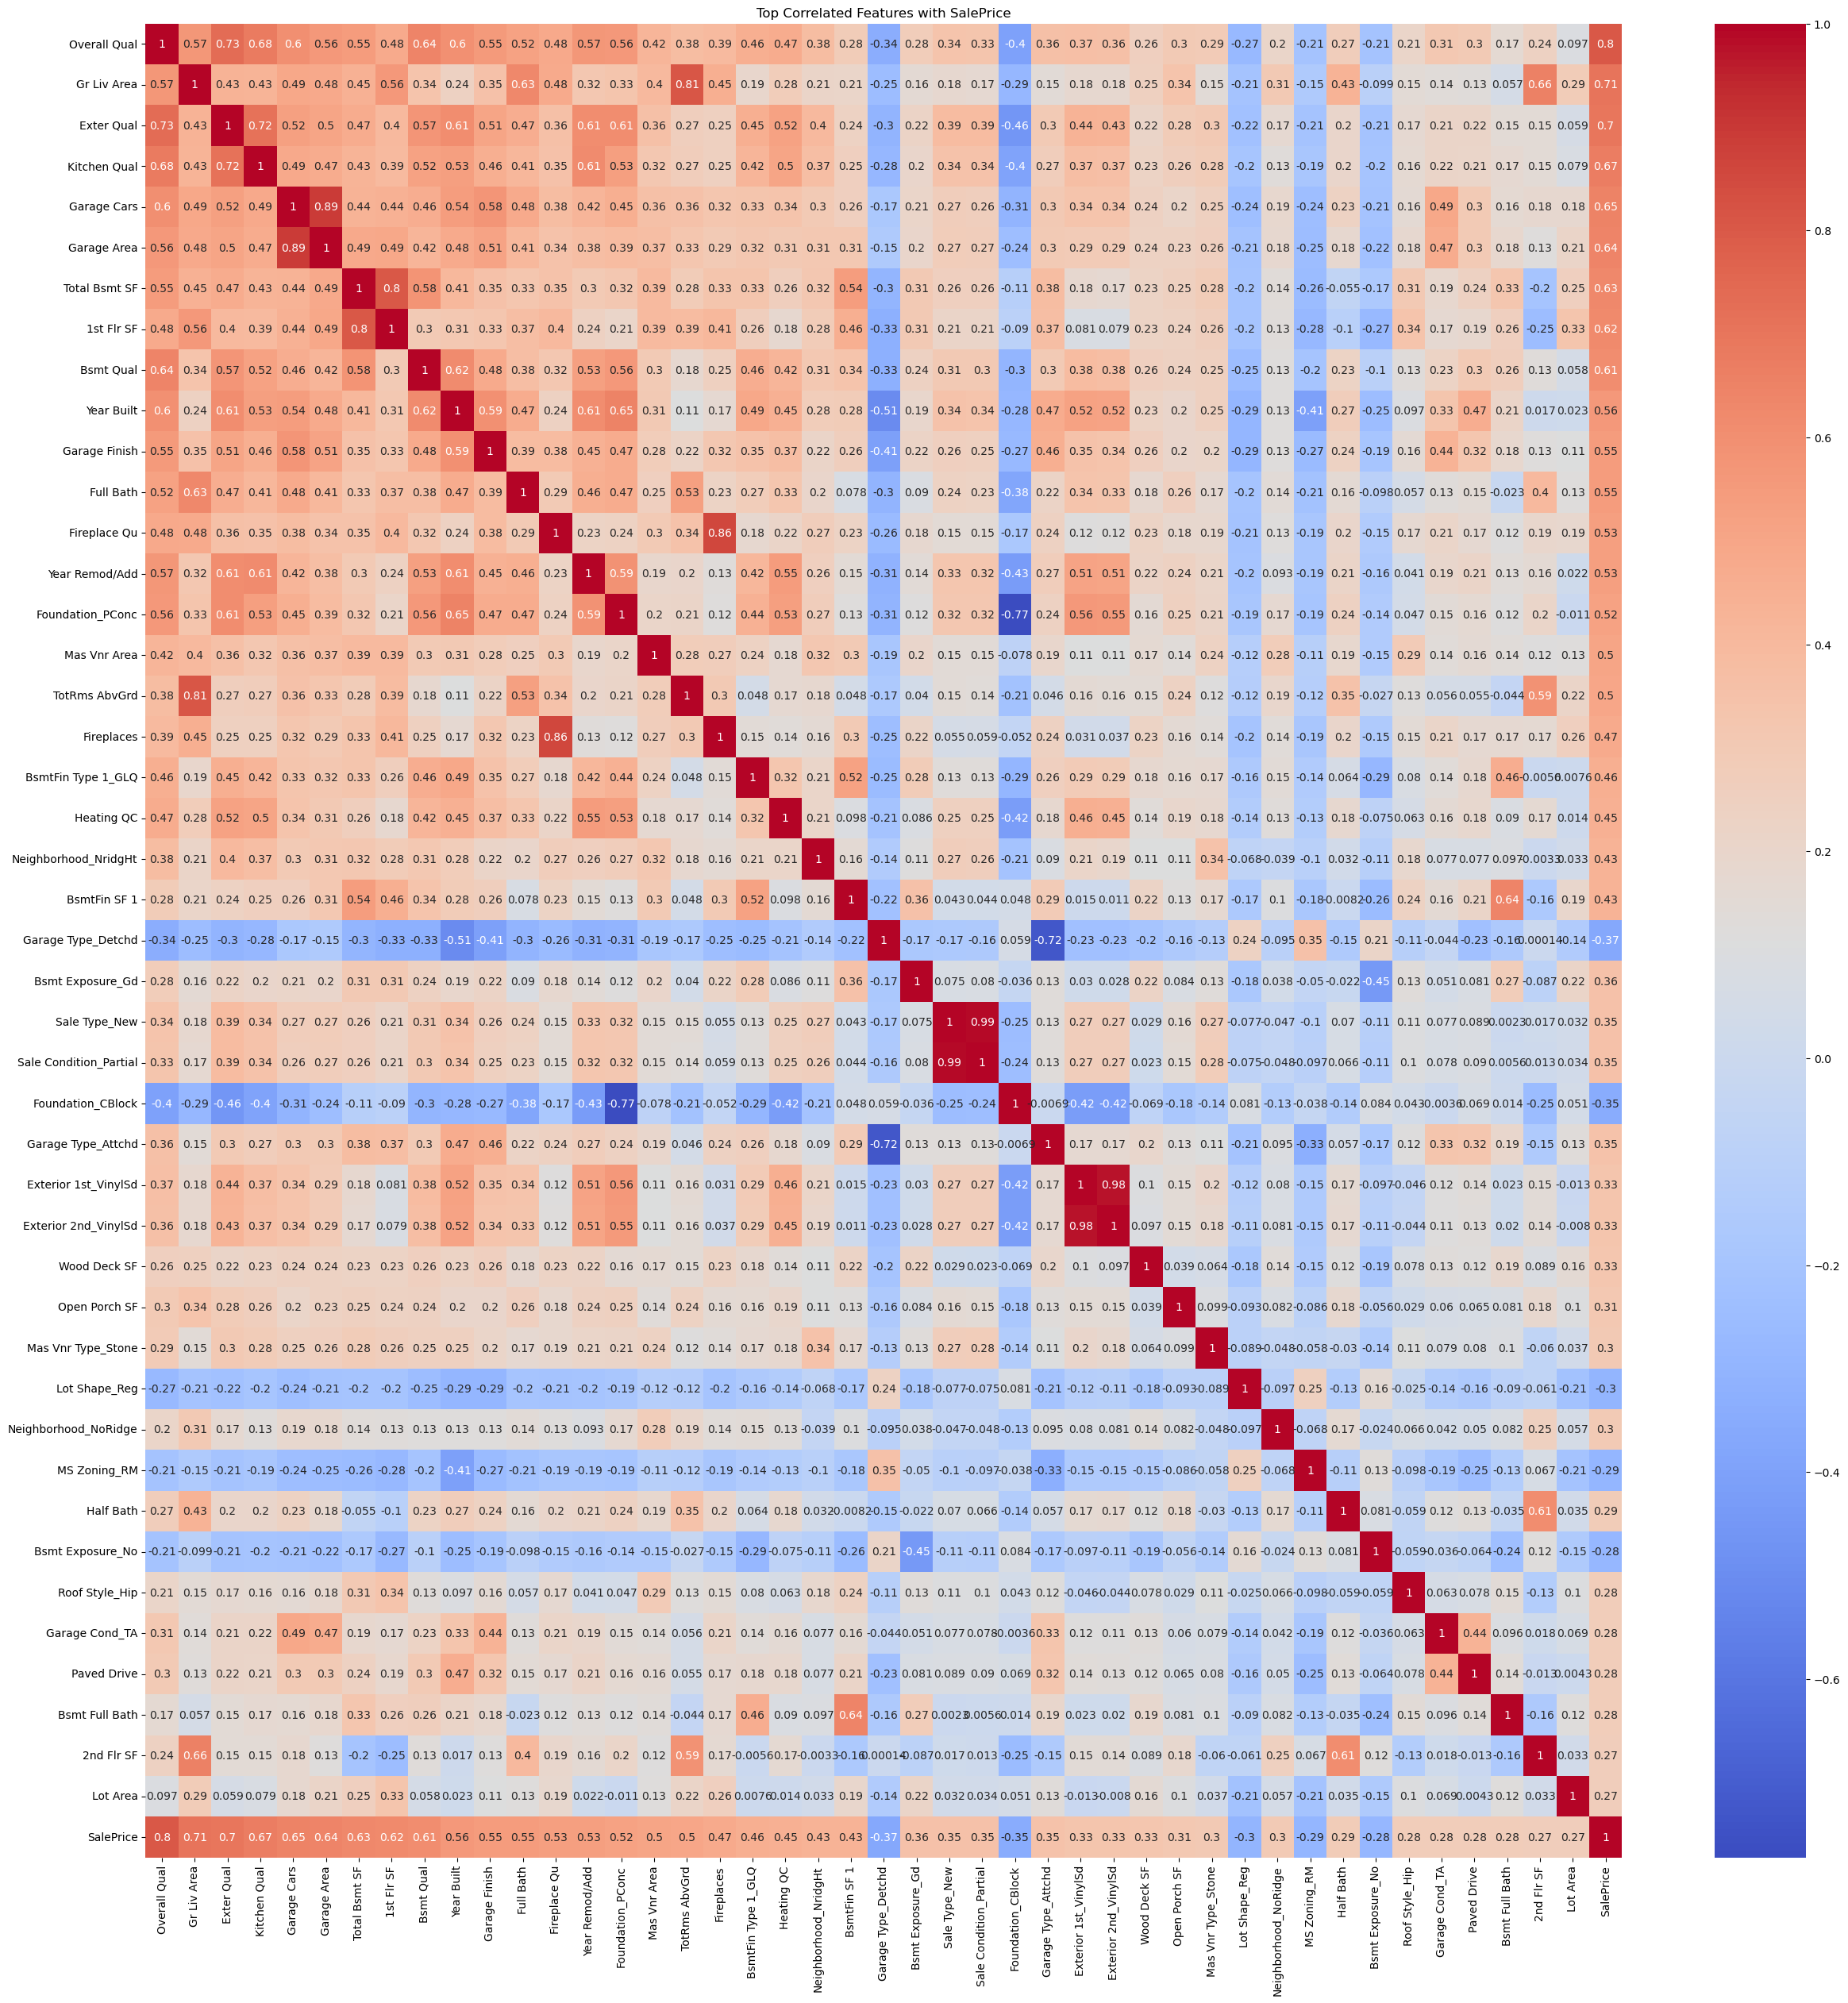

In [11]:
# Use only numeric columns for correlation
#corr = df.select_dtypes(include=['number']).corr()
# Use only numeric columns
corr = df_encoded.corr()

# Get top correlations with SalePrice (excluding itself)
top_corr = corr['SalePrice'].abs().sort_values(ascending=False) [1:45]  # top 20 features

# Plot heatmap for those
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 30))
sns.heatmap(df_encoded[top_corr.index.tolist() + ['SalePrice']].corr(), annot=True, cmap='coolwarm')
plt.title('Top Correlated Features with SalePrice')
plt.show()



In [12]:
# >0.3
target3 = 'SalePrice'
features3 = top_corr[top_corr > 0.3].index.tolist()
print(features3)

['Overall Qual', 'Gr Liv Area', 'Exter Qual', 'Kitchen Qual', 'Garage Cars', 'Garage Area', 'Total Bsmt SF', '1st Flr SF', 'Bsmt Qual', 'Year Built', 'Garage Finish', 'Full Bath', 'Fireplace Qu', 'Year Remod/Add', 'Foundation_PConc', 'Mas Vnr Area', 'TotRms AbvGrd', 'Fireplaces', 'BsmtFin Type 1_GLQ', 'Heating QC', 'Neighborhood_NridgHt', 'BsmtFin SF 1', 'Garage Type_Detchd', 'Bsmt Exposure_Gd', 'Sale Type_New', 'Sale Condition_Partial', 'Foundation_CBlock', 'Garage Type_Attchd', 'Exterior 1st_VinylSd', 'Exterior 2nd_VinylSd', 'Wood Deck SF', 'Open Porch SF', 'Mas Vnr Type_Stone', 'Lot Shape_Reg']


In [13]:
X = df_encoded[features3]
y = df_encoded[target3]

In [14]:
Xtrain3, Xtest3, ytrain3, ytest3 = train_test_split(X, y, test_size=0.2)

In [15]:
scaler3 = StandardScaler()
Xtrain_scaled3 = scaler3.fit_transform(Xtrain3)
Xtest_scaled3 = scaler3.transform(Xtest3)

In [16]:
alhpas = np.logspace(-10, 3, num=100)

In [17]:
reg3 = LassoCV(alphas=alhpas, cv=5)

In [18]:
reg3.fit(Xtrain_scaled3, ytrain3)

LassoCV(alphas=array([1.00000000e-10, 1.35304777e-10, 1.83073828e-10, 2.47707636e-10,
       3.35160265e-10, 4.53487851e-10, 6.13590727e-10, 8.30217568e-10,
       1.12332403e-09, 1.51991108e-09, 2.05651231e-09, 2.78255940e-09,
       3.76493581e-09, 5.09413801e-09, 6.89261210e-09, 9.32603347e-09,
       1.26185688e-08, 1.70735265e-08, 2.31012970e-08, 3.12571585e-08,
       4.22924287e-08, 5.72236766e-0...
       9.54548457e-01, 1.29154967e+00, 1.74752840e+00, 2.36448941e+00,
       3.19926714e+00, 4.32876128e+00, 5.85702082e+00, 7.92482898e+00,
       1.07226722e+01, 1.45082878e+01, 1.96304065e+01, 2.65608778e+01,
       3.59381366e+01, 4.86260158e+01, 6.57933225e+01, 8.90215085e+01,
       1.20450354e+02, 1.62975083e+02, 2.20513074e+02, 2.98364724e+02,
       4.03701726e+02, 5.46227722e+02, 7.39072203e+02, 1.00000000e+03]),
        cv=5)

In [19]:
reg3.coef_

array([16614.24628462, 19122.87204924,  5271.90528296,  6545.32337728,
        3869.36363505,  3828.51957462,   232.11658823,  5195.55945558,
        4404.39621467,  1088.99817784,   391.46528708,     0.        ,
        2877.76032809,  1713.11282606,     0.        ,  3798.6086107 ,
         605.82526942,  2282.7291227 ,   975.401259  ,  2454.80952968,
        7322.20949277,  6101.76476071, -1113.01945594,  6243.2551355 ,
        3154.44188412,     0.        ,    -0.        ,     0.        ,
           0.        ,   261.03553016,  1947.98621266,    -0.        ,
          -0.        , -2045.6395342 ])

In [20]:
reg3.intercept_

np.float64(180546.6616894198)

In [21]:
y_pred_train3 = reg3.predict(Xtrain_scaled3)

In [22]:
y_pred_test3 = reg3.predict(Xtest_scaled3)

In [23]:
print('r2_score = \t\t\t', r2_score(ytrain3, y_pred_train3))
print('mean_squared_error = \t\t', mean_squared_error(ytrain3, y_pred_train3))
print('mean_absolute_error = \t', mean_absolute_error(ytrain3, y_pred_train3))
print('mean_absolute_percentage_error = ', mean_absolute_percentage_error(ytrain3, y_pred_train3))

r2_score = 			 0.8370580991930656
mean_squared_error = 		 1018253245.3686395
mean_absolute_error = 	 19994.120064831066
mean_absolute_percentage_error =  0.12129818649473965


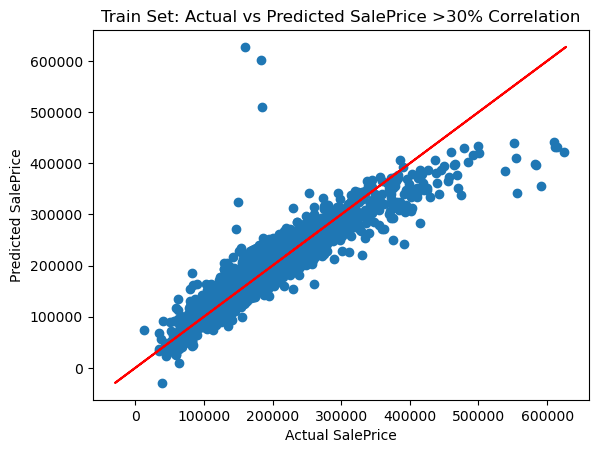

In [24]:
plt.scatter(ytrain3, y_pred_train3)
plt.plot(y_pred_train3, y_pred_train3, color='red')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Train Set: Actual vs Predicted SalePrice >30% Correlation')
plt.show()

r2_score = 			 0.8486736791000278
mean_squared_error = 		 1044236969.6498182
mean_absolute_error = 	 20603.579883679697
mean_absolute_percentage_error =  0.11680194991583355


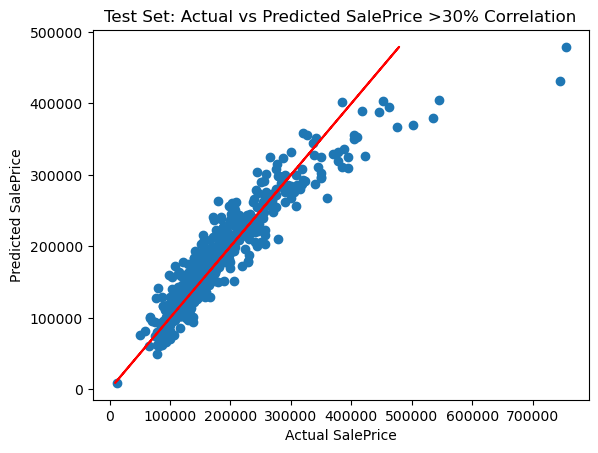

In [25]:
print('r2_score = \t\t\t', r2_score(ytest3, y_pred_test3))
print('mean_squared_error = \t\t', mean_squared_error(ytest3, y_pred_test3))
print('mean_absolute_error = \t', mean_absolute_error(ytest3, y_pred_test3))
print('mean_absolute_percentage_error = ', mean_absolute_percentage_error(ytest3, y_pred_test3))
plt.scatter(ytest3, y_pred_test3)
plt.plot(y_pred_test3, y_pred_test3, color='red')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Test Set: Actual vs Predicted SalePrice >30% Correlation')
plt.show()

In [26]:
# >0.5
target = 'SalePrice'
features = top_corr[top_corr > 0.5].index.tolist()
print(features)

['Overall Qual', 'Gr Liv Area', 'Exter Qual', 'Kitchen Qual', 'Garage Cars', 'Garage Area', 'Total Bsmt SF', '1st Flr SF', 'Bsmt Qual', 'Year Built', 'Garage Finish', 'Full Bath', 'Fireplace Qu', 'Year Remod/Add', 'Foundation_PConc', 'Mas Vnr Area']


In [27]:
X = df_encoded[features]
y = df_encoded[target]

In [28]:
X_train, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

In [29]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
Xtest_scaled = scaler.transform(Xtest)

In [ ]:
alphas = np.logspace(-10, 3, num=100)
reg = LassoCV(alphas=alphas, cv=5)

In [31]:
reg.fit(X_scaled, ytrain)

LassoCV(alphas=array([1.00000000e-10, 1.35304777e-10, 1.83073828e-10, 2.47707636e-10,
       3.35160265e-10, 4.53487851e-10, 6.13590727e-10, 8.30217568e-10,
       1.12332403e-09, 1.51991108e-09, 2.05651231e-09, 2.78255940e-09,
       3.76493581e-09, 5.09413801e-09, 6.89261210e-09, 9.32603347e-09,
       1.26185688e-08, 1.70735265e-08, 2.31012970e-08, 3.12571585e-08,
       4.22924287e-08, 5.72236766e-0...
       9.54548457e-01, 1.29154967e+00, 1.74752840e+00, 2.36448941e+00,
       3.19926714e+00, 4.32876128e+00, 5.85702082e+00, 7.92482898e+00,
       1.07226722e+01, 1.45082878e+01, 1.96304065e+01, 2.65608778e+01,
       3.59381366e+01, 4.86260158e+01, 6.57933225e+01, 8.90215085e+01,
       1.20450354e+02, 1.62975083e+02, 2.20513074e+02, 2.98364724e+02,
       4.03701726e+02, 5.46227722e+02, 7.39072203e+02, 1.00000000e+03]),
        cv=5)

In [32]:
reg.coef_

array([18271.39880854, 20284.64184312,  7097.62192632,  9263.05601419,
        3155.56767384,  5161.41691431,  3860.33006984,  7667.4621504 ,
        6356.25863163,  2737.69553651,   741.81901859,    -0.        ,
        5422.94397634,   518.58947193,     0.        ,  5456.34289444])

In [33]:
reg.intercept_

np.float64(180483.12073378838)

In [34]:
y_pred_train = reg.predict(X_scaled)
y_pred_test = reg.predict(Xtest_scaled)

In [35]:
print('r2_score = \t\t\t', r2_score(ytrain, y_pred_train))
print('mean_squared_error = \t\t', mean_squared_error(ytrain, y_pred_train))
print('mean_absolute_error = \t', mean_absolute_error(ytrain, y_pred_train))
print('mean_absolute_percentage_error = ', mean_absolute_percentage_error(ytrain, y_pred_train))

r2_score = 			 0.8133406629781792
mean_squared_error = 		 1203172324.7764456
mean_absolute_error = 	 22524.971739750912
mean_absolute_percentage_error =  0.1361079948417383


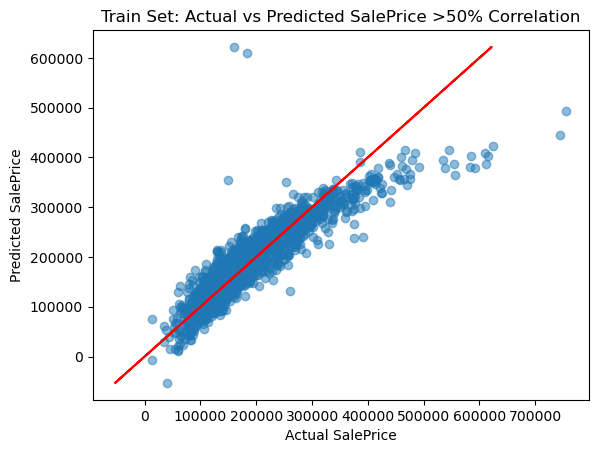

In [36]:
plt.scatter(ytrain, y_pred_train, alpha=0.5)

plt.plot(y_pred_train, y_pred_train, color='red')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Train Set: Actual vs Predicted SalePrice >50% Correlation')
plt.show()


In [37]:
print('r2_score = \t\t\t', r2_score(ytest, y_pred_test))
print('mean_squared_error = \t\t', mean_squared_error(ytest, y_pred_test))
print('mean_absolute_error = \t\t', mean_absolute_error(ytest, y_pred_test))


r2_score = 			 0.8368603152734424
mean_squared_error = 		 997320588.9386036
mean_absolute_error = 		 21693.68078727254


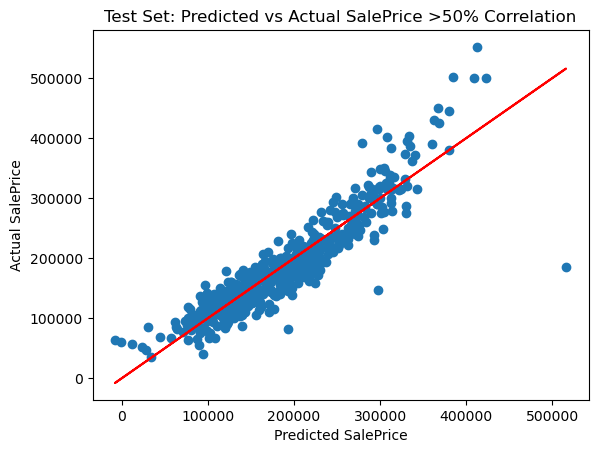

In [38]:
plt.scatter(y_pred_test, ytest)
plt.plot(y_pred_test, y_pred_test, color='red')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Actual SalePrice')
plt.title('Test Set: Predicted vs Actual SalePrice >50% Correlation')
plt.show()

In [39]:
def evaluate(y_true, y_pred):
    print(f"R² Score: {r2_score(y_true, y_pred):.4f}")
    print(f"MAE     : {mean_absolute_error(y_true, y_pred):,.0f}")
    print(f"RMSE    : {np.sqrt(mean_squared_error(y_true, y_pred)):.0f}")

evaluate(ytest, y_pred_test)


R² Score: 0.8369
MAE     : 21,694
RMSE    : 31580


# Model Assumptions

### Homoscedasticity
#### ❌

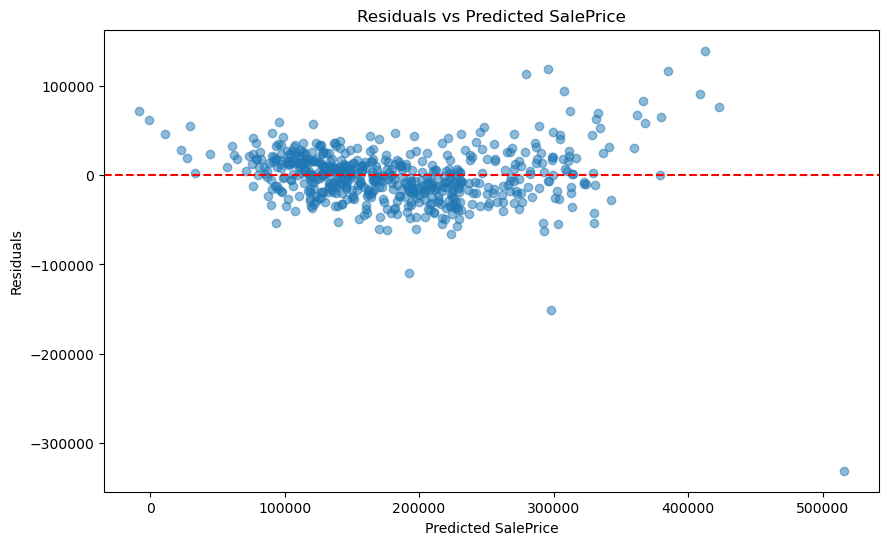

In [40]:
#residual = ytest - y_pred_test
residual = ytest - y_pred_test
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_test, residual, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted SalePrice')
plt.show()

### Normality of Residuals
#### ε∼N(0,σ2); Mean close to 0❓✅, Normal distribution: No need

In [46]:
#print model's mean = 0 and variance = sigma^2
print(f"Mean of Residuals: {residual.mean():.2f}")
print(f"Variance of Residuals: {residual.var():.2f}")

Mean of Residuals: -682.87
Variance of Residuals: 998558304.55


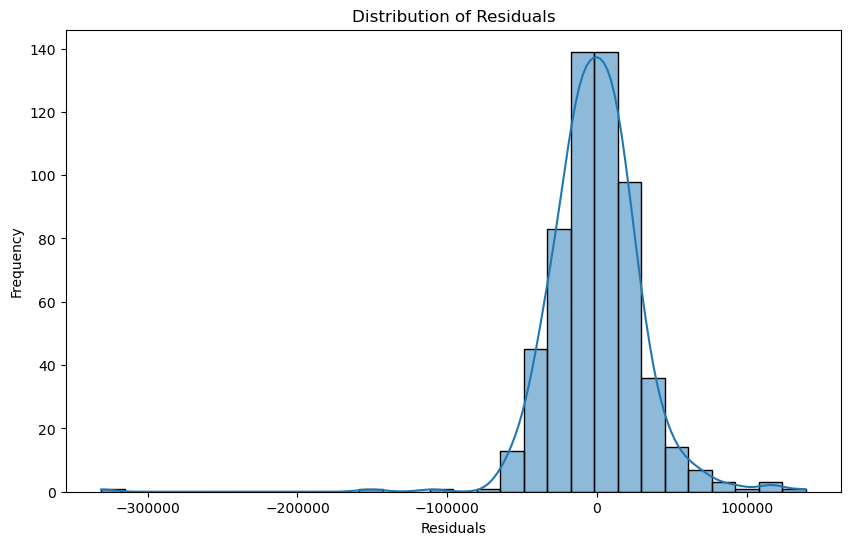

In [41]:
# Plotting the distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residual, kde=True, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

####

Text(0, 0.5, 'y')

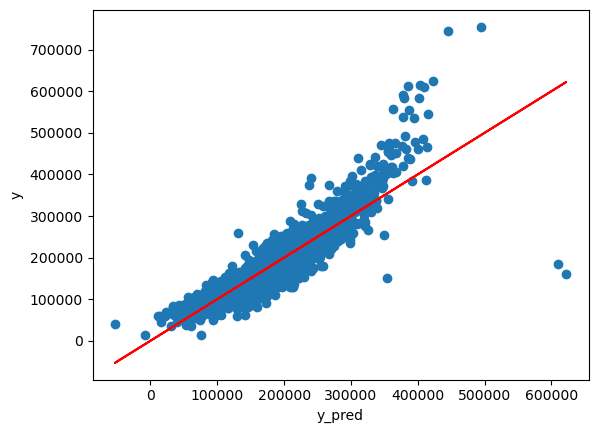

In [51]:
plt.scatter(y_pred_train, ytrain)
plt.plot(y_pred_train, y_pred_train, color='red')
plt.xlabel('y_pred')
plt.ylabel('y')